<a href="https://colab.research.google.com/github/TharaThankachan/Assignment_1_Sep/blob/main/Case_Study_Classification_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/loan_dataset.csv')

In [3]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
df.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [5]:
df.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12'],axis=1,inplace=True)

In [6]:
df.drop(['source','financial_institution'],axis=1,inplace=True)

In [7]:
df.dtypes

loan_id                       int64
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m13                           int64
dtype: object

In [8]:
df['origination_date'].nunique()

3

In [9]:
df.origination_date.unique()

array(['2012-03-01', '2012-01-01', '2012-02-01'], dtype=object)

In [10]:
# Label encoding for origination date

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['origination_date']=le.fit_transform(df['origination_date'])
df['first_payment_date']=le.fit_transform(df['first_payment_date'])

In [13]:
df.dtypes

loan_id                       int64
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date              int64
first_payment_date            int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m13                           int64
dtype: object

In [ ]:
# extracting numbers from loan purpose

In [14]:
df['loan_purpose']=df.loan_purpose.str.extract('(\d+)')

In [17]:
df.dtypes

loan_id                       int64
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date              int64
first_payment_date            int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m13                           int64
dtype: object

In [16]:
df.isna().sum()

loan_id                     0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m13                         0
dtype: int64

In [18]:
df['loan_purpose']=df['loan_purpose'].astype('int')

In [19]:
df.dtypes

loan_id                       int64
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date              int64
first_payment_date            int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                  int64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m13                           int64
dtype: object

In [ ]:
# Target=m13

In [20]:
y=df['m13']
x=df.drop('m13',axis=1)

In [ ]:
# Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr=lr.fit(x_train,y_train)
lr_y_predict=lr.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [25]:
print("Confusion Metrix:",confusion_matrix(y_test,lr_y_predict))

Confusion Metrix: [[23084     0]
 [  128     0]]


In [26]:
print("Accuracy Score:",accuracy_score(y_test,lr_y_predict))

Accuracy Score: 0.9944856108909185


In [27]:
print("Precision score:",precision_score(y_test,lr_y_predict))

Precision score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print("Recall Value:",recall_score(y_test,lr_y_predict))

Recall Value: 0.0


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23084
           1       0.00      0.00      0.00       128

    accuracy                           0.99     23212
   macro avg       0.50      0.50      0.50     23212
weighted avg       0.99      0.99      0.99     23212



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [34]:
knn=[]
neighbors=range(3,15)
for k in neighbors:
 knn_clf=KNeighborsClassifier(n_neighbors=k)
 knn_clf=knn_clf.fit(x_train,y_train)
 knn_y_prediction=knn_clf.predict(x_test)
 accuracy=accuracy_score(y_test,knn_y_prediction)
 knn.append(accuracy)
knn

[0.9943994485610891,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185]

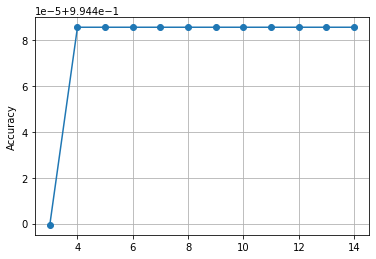

In [35]:
plt.plot(neighbors, knn,'o-')
plt.xlabel=('K values')
plt.ylabel('Accuracy')
plt.grid()

In [39]:
knn_clf1=KNeighborsClassifier(n_neighbors=14)
knn_clf1=knn_clf1.fit(x_train,y_train)
knn_y_prediction=knn_clf1.predict(x_test)
accuracy1=accuracy_score(y_test,knn_y_prediction)
print("Accuracy:",accuracy_score(y_test,knn_y_prediction))


Accuracy: 0.9944856108909185


In [41]:
print("Confusion Matrix:",confusion_matrix(y_test,knn_y_prediction))

Confusion Matrix: [[23084     0]
 [  128     0]]


In [42]:
print("Precision Value:",precision_score(y_test,knn_y_prediction))

Precision Value: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print('Recall Value:',recall_score(y_test,knn_y_prediction))

Recall Value: 0.0


In [49]:
print(classification_report(y_test,knn_y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23084
           1       0.00      0.00      0.00       128

    accuracy                           0.99     23212
   macro avg       0.50      0.50      0.50     23212
weighted avg       0.99      0.99      0.99     23212



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest Classifier

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc=RandomForestClassifier()

In [48]:
rfc=rfc.fit(x_train,y_train)
rfc_y_predict=rfc.predict(x_test)

In [51]:
print("Confusion Matrix:",confusion_matrix(y_test,rfc_y_predict))

Confusion Matrix: [[23084     0]
 [  128     0]]


In [52]:
print("Accuracy Score:",accuracy_score(y_test,rfc_y_predict))

Accuracy Score: 0.9944856108909185


In [55]:
print("Precision Score:",precision_score(y_test,rfc_y_predict))

Precision Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print(classification_report(y_test,rfc_y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23084
           1       0.00      0.00      0.00       128

    accuracy                           0.99     23212
   macro avg       0.50      0.50      0.50     23212
weighted avg       0.99      0.99      0.99     23212



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#decision Tree

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt=DecisionTreeClassifier()

In [61]:
dt=dt.fit(x_train,y_train)

In [62]:
dt_y_predict=dt.predict(x_test)

In [63]:
confusion_matrix(y_test,dt_y_predict)

array([[22914,   170],
       [  126,     2]])

In [64]:
accuracy_score(y_test,dt_y_predict)

0.987247975185249

In [65]:
precision_score(y_test,dt_y_predict)

0.011627906976744186

In [66]:
recall_score(y_test,dt_y_predict)

0.015625

In [ ]:
# Conclusion Decision tree classification has less accuracy 